In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from scripts.model import train_model, evaluate_model, save_model

In [2]:
df = pd.read_csv('data/species_500_20k_min_45.csv')
len(df)

884

In [3]:
x = df.sequence
y = df.species

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [4]:
model = train_model(x_train=x_train, y_train=y_train)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [5]:
y_pred = evaluate_model(model, x_test, x_train)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [6]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1:', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8914027149321267
Precision: 0.891917954050307
Recall: 0.8916754024484288
F1: 0.8825752809508504


In [7]:
# pickle.dump(model, open('./models/model_species.pickle', 'wb'))
# df_train = pd.DataFrame({ 'sequence': x_train, 'species': y_train })
# df_train.to_csv('data/species_train.csv', index=False)
# df_test = pd.DataFrame({ 'sequence': x_test, 'species': y_test })
# df_test.to_csv('data/species_test.csv', index=False)

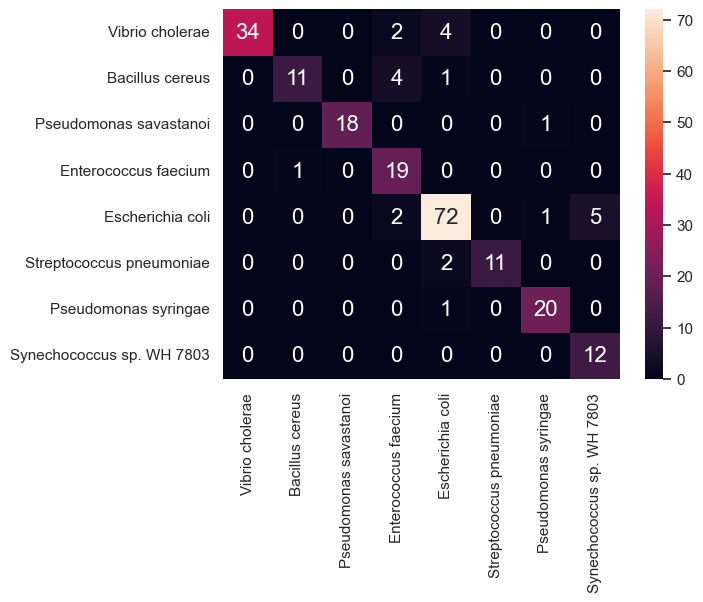

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=df['species'].unique())
df_cm = pd.DataFrame(cm, df['species'].unique(), df['species'].unique())
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()